In [1]:
import pandas as pd  # Pandas proporciona estructuras de datos y herramientas para el análisis de datos.
import seaborn as sns  # Seaborn es una biblioteca de visualización de datos basada en matplotlib.
import matplotlib.pyplot as plt  # Matplotlib es una biblioteca de gráficos 2D que produce figuras de calidad de publicación.
from pathlib import Path  # Pathlib ofrece clases para manejar rutas de archivos de manera orientada a objetos.
import os  # La biblioteca os permite interactuar con el sistema operativo.

In [2]:
s_path = Path.cwd()  # Obtiene el directorio de trabajo actual como un objeto Path.
s_prt_path = s_path.parent/'..'/'BD_XM' # Accede al directorio padre del directorio actual. Utilizamos '..' para subir un nivel en la jerarquía de directorios.
ruta_carpeta_atras = s_prt_path.resolve() # Normalizamos la ruta para resolver cualquier ruta relativa
ruta_csv = os.path.join(s_prt_path,'Data_XM.csv')  # Crea una ruta al archivo CSV en el directorio padre.
df_DataModel= pd.read_csv(ruta_csv)  # Lee el archivo CSV en un DataFrame de pandas.

In [3]:
df_DataModel['Date'] = pd.to_datetime(df_DataModel['Date'])  # Convierte la columna 'Date' a tipo datetime.
df_DataModel.drop('Unnamed: 0', axis=1, inplace=True)  # Elimina la columna 'Unnamed: 0'.

In [4]:
df_DataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3013 non-null   datetime64[ns]
 1   Demanda    3013 non-null   float64       
 2   VolUtil    3013 non-null   float64       
 3   Aportes    3013 non-null   float64       
 4   PrecioB    3013 non-null   float64       
 5   PrecioO    3013 non-null   float64       
 6   DispTer    3013 non-null   float64       
 7   DispNoTer  3013 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 188.4 KB


In [5]:
# Establece la fecha límite hasta la cual deseas mantener los datos.
fecha_limite = pd.to_datetime('2019-12-31')

In [6]:
# Filtra el DataFrame para mantener solo las filas con fechas hasta la fecha límite.
df_filtrado = df_DataModel[df_DataModel['Date'] <= fecha_limite]

In [7]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1461 non-null   datetime64[ns]
 1   Demanda    1461 non-null   float64       
 2   VolUtil    1461 non-null   float64       
 3   Aportes    1461 non-null   float64       
 4   PrecioB    1461 non-null   float64       
 5   PrecioO    1461 non-null   float64       
 6   DispTer    1461 non-null   float64       
 7   DispNoTer  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 102.7 KB


In [9]:
df_filtrado

,Date,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
0,2016-01-01,5.885745e+06,1.055541e+10,63496200.0,407.565972,414.206983,3.978219e+06,8.762403e+06
1,2016-01-02,6.352403e+06,1.053737e+10,55776100.0,407.627913,418.642247,3.987585e+06,8.949453e+06
2,2016-01-03,6.285871e+06,1.052841e+10,61744800.0,499.329203,426.290040,3.930220e+06,8.916347e+06
3,2016-01-04,7.226923e+06,1.050766e+10,70137500.0,535.140967,414.717455,3.882154e+06,9.002401e+06
4,2016-01-05,7.485122e+06,1.047468e+10,64121400.0,573.129733,427.959078,3.891292e+06,8.855396e+06
...,...,...,...,...,...,...,...,...
1456,2019-12-27,8.260824e+06,1.117787e+10,100303900.0,331.918402,302.794510,4.262402e+06,9.518060e+06
1457,2019-12-28,8.007257e+06,1.112934e+10,80942900.0,279.387930,306.500796,4.269000e+06,9.845753e+06
1458,2019-12-29,7.483461e+06,1.108964e+10,78816500.0,246.472593,321.978669,4.259506e+06,9.736093e+06
1459,2019-12-30,7.926581e+06,1.107393e+10,110690400.0,323.892900,309.392542,4.285540e+06,9.428000e+06


In [10]:
ncol = len(df_filtrado.columns)  # Calcula el número de columnas en el DataFrame.
name_column = list(df_filtrado.columns)  # Crea una lista con los nombres de las columnas.
print(ncol)  # Imprime el número de columnas.
print(name_column)  # Imprime la lista de nombres de columnas.

8
['Date', 'Demanda', 'VolUtil', 'Aportes', 'PrecioB', 'PrecioO', 'DispTer', 'DispNoTer']


In [11]:
ylabels = [
    'Demanda [kWh-día]',
    'Volumen Útil [kWh-día]',
    'Aportes [kWh-día]',
    'Precio de Bolsa [$/kWh-día]',
    'Precio de Oferta [$/kWh-día]',
    'Disponibilidad Térmica [kWh-día]',
    'Disponibilidad No Térmica [kWh-día]'
]

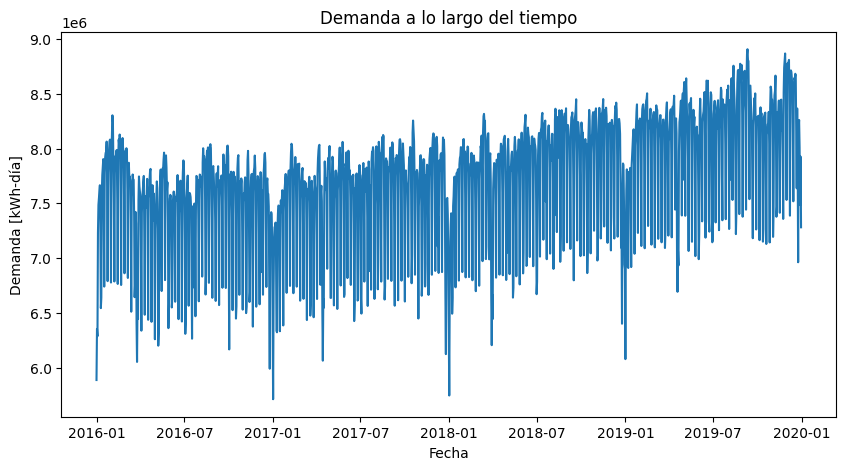

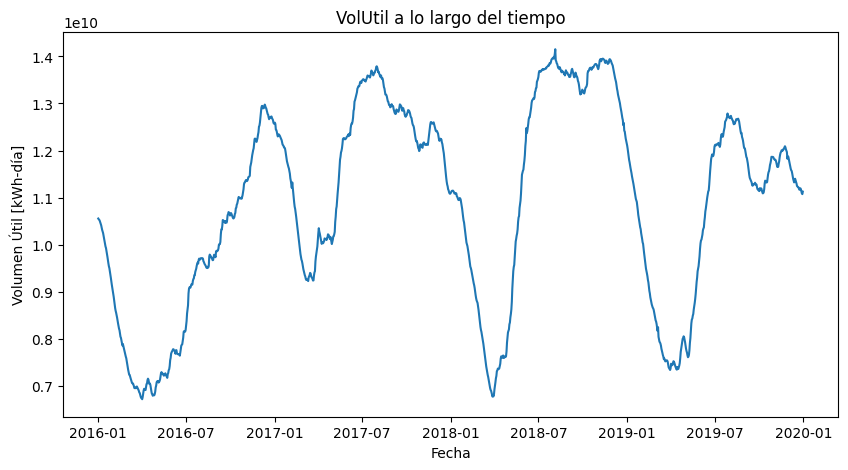

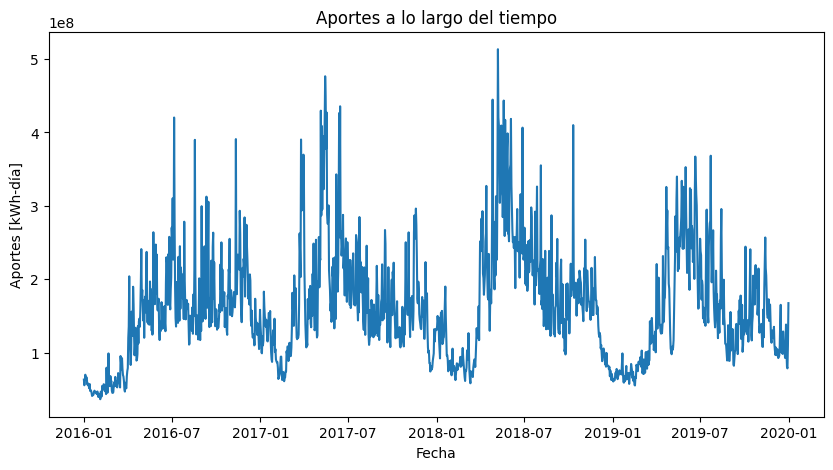

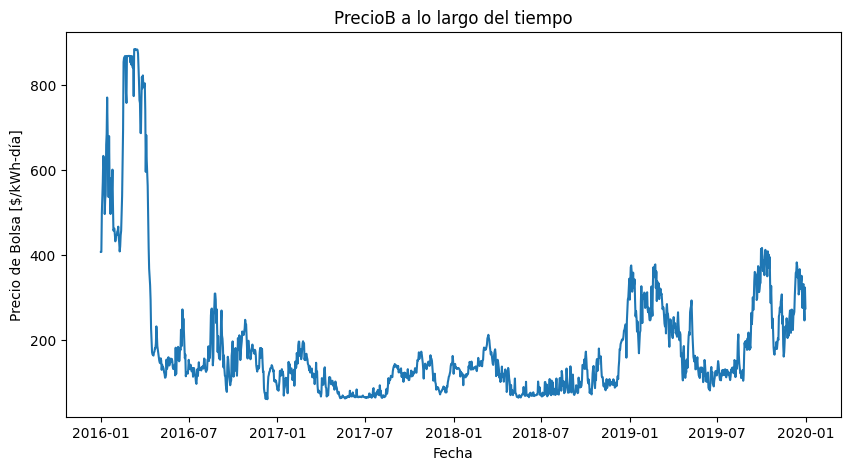

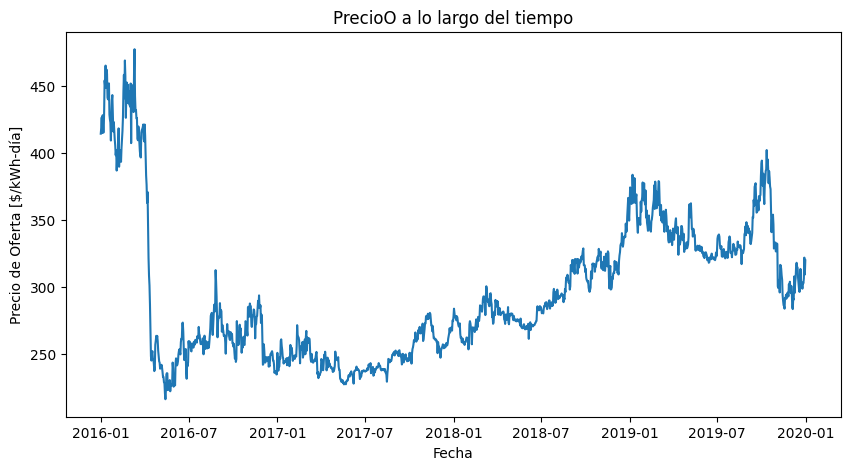

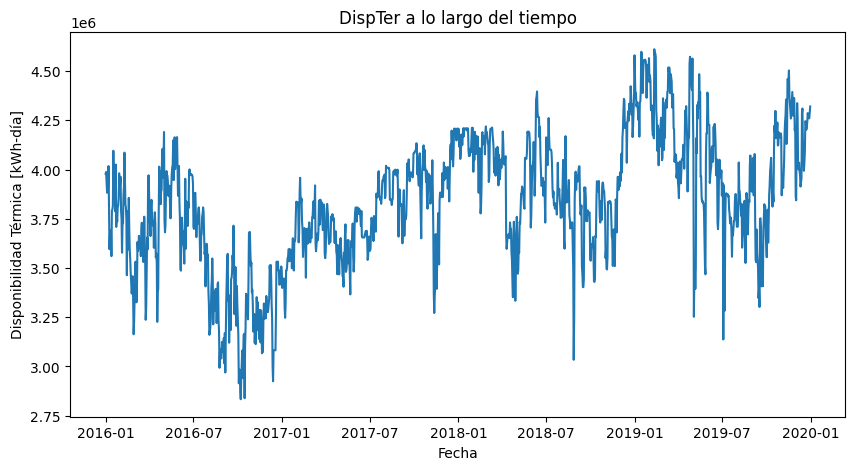

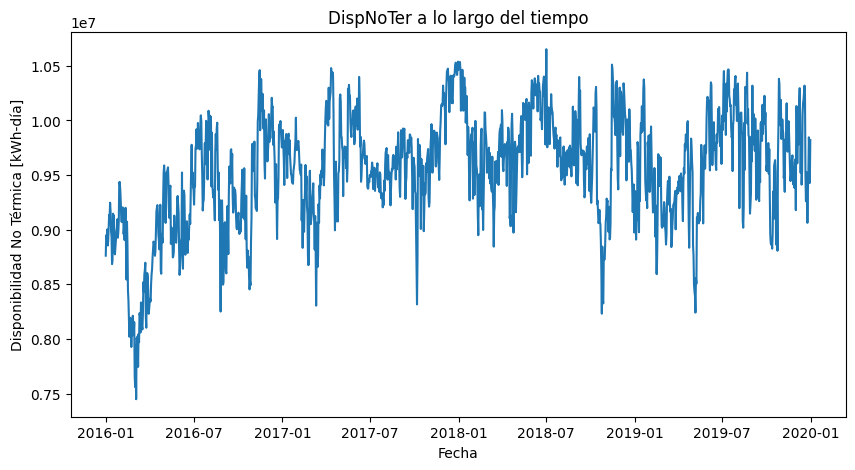

In [13]:
for i in range(1,ncol):
    plt.figure(figsize=(10, 5))  # Configurar el tamaño del gráfico
    sns.lineplot(data=df_filtrado, x='Date', y=df_filtrado.columns[i])
    plt.title(f'{df_filtrado.columns[i]} a lo largo del tiempo')  # Título del gráfico
    plt.xlabel('Fecha')  # Etiqueta del eje X
    plt.ylabel(ylabels[i-1])  # Etiqueta del eje Y correspondiente de la lista 'ylabels'
    plt.show()  # Mostrar el gráfico

In [16]:
df_filtrado.describe()

,Date,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
count,1461,1.461000e+03,1.461000e+03,1.461000e+03,1461.000000,1461.000000,1.461000e+03,1.461000e+03
mean,2017-12-31 00:00:00,7.712159e+06,1.085602e+10,1.626325e+08,187.692463,295.600390,3.833843e+06,9.550773e+06
min,2016-01-01 00:00:00,5.710414e+06,6.715669e+09,3.678070e+07,61.172760,216.628100,2.833833e+06,7.448813e+06
25%,2016-12-31 00:00:00,7.428591e+06,9.280893e+09,1.086361e+08,101.725570,253.987647,3.634176e+06,9.245976e+06
50%,2017-12-31 00:00:00,7.796807e+06,1.121941e+10,1.515823e+08,134.948848,280.436033,3.841667e+06,9.597394e+06
75%,2018-12-31 00:00:00,8.100474e+06,1.263633e+10,2.035742e+08,204.555825,326.965855,4.051476e+06,9.905198e+06
max,2019-12-31 00:00:00,8.907432e+06,1.415296e+10,5.133595e+08,884.365690,477.060619,4.610788e+06,1.065188e+07
std,NaN,5.579646e+05,2.142237e+09,7.585717e+07,156.827258,52.385064,3.242596e+05,5.143221e+05


In [17]:
from sklearn.preprocessing import MinMaxScaler  # Importa la clase MinMaxScaler para la normalización de datos.

In [18]:
df_DataModelAnalisis = df_filtrado[name_column[1::]]  # Crea un nuevo DataFrame con columnas seleccionadas.

In [19]:
df_DataModelAnalisis.head()

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
0,5.885745e+06,1.055541e+10,63496200.0,407.565972,414.206983,3.978219e+06,8.762403e+06
1,6.352403e+06,1.053737e+10,55776100.0,407.627913,418.642247,3.987585e+06,8.949453e+06
2,6.285871e+06,1.052841e+10,61744800.0,499.329203,426.290040,3.930220e+06,8.916347e+06
3,7.226923e+06,1.050766e+10,70137500.0,535.140967,414.717455,3.882154e+06,9.002401e+06
4,7.485122e+06,1.047468e+10,64121400.0,573.129733,427.959078,3.891292e+06,8.855396e+06


In [20]:
# Inicializamos el escalador MinMaxScaler con el rango deseado de 0 a 1.
MinMax = MinMaxScaler(copy=True, feature_range=(0, 1))

# Obtenemos los nombres de las columnas del DataFrame para su uso posterior.
nombres = df_DataModelAnalisis.columns

# Aplicamos la transformación MinMax a los datos para normalizarlos.
Datos_Min_Max = MinMax.fit_transform(df_DataModelAnalisis)

# Convertimos el array resultante en un DataFrame y asignamos los nombres de las columnas originales.
Datos_Min_Max = pd.DataFrame(Datos_Min_Max, columns = nombres)

In [21]:
Datos_Min_Max.head(10)

,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
0,0.054842,0.516282,0.056057,0.420792,0.758657,0.644015,0.410104
1,0.200809,0.513857,0.039858,0.420868,0.775687,0.649286,0.468501
2,0.179998,0.512652,0.052382,0.532265,0.805053,0.617003,0.458166
3,0.474351,0.509862,0.069992,0.575768,0.760617,0.589954,0.485032
4,0.555113,0.505427,0.057369,0.621916,0.811462,0.595096,0.439137
5,0.572642,0.501171,0.062394,0.695198,0.761720,0.601943,0.451808
6,0.586652,0.497081,0.061921,0.690439,0.762274,0.666126,0.493014
7,0.611388,0.489842,0.042251,0.639067,0.820908,0.550002,0.526635
8,0.503241,0.483989,0.045640,0.529126,0.910798,0.428651,0.522131
9,0.260243,0.479485,0.039703,0.573193,0.895678,0.471627,0.561494


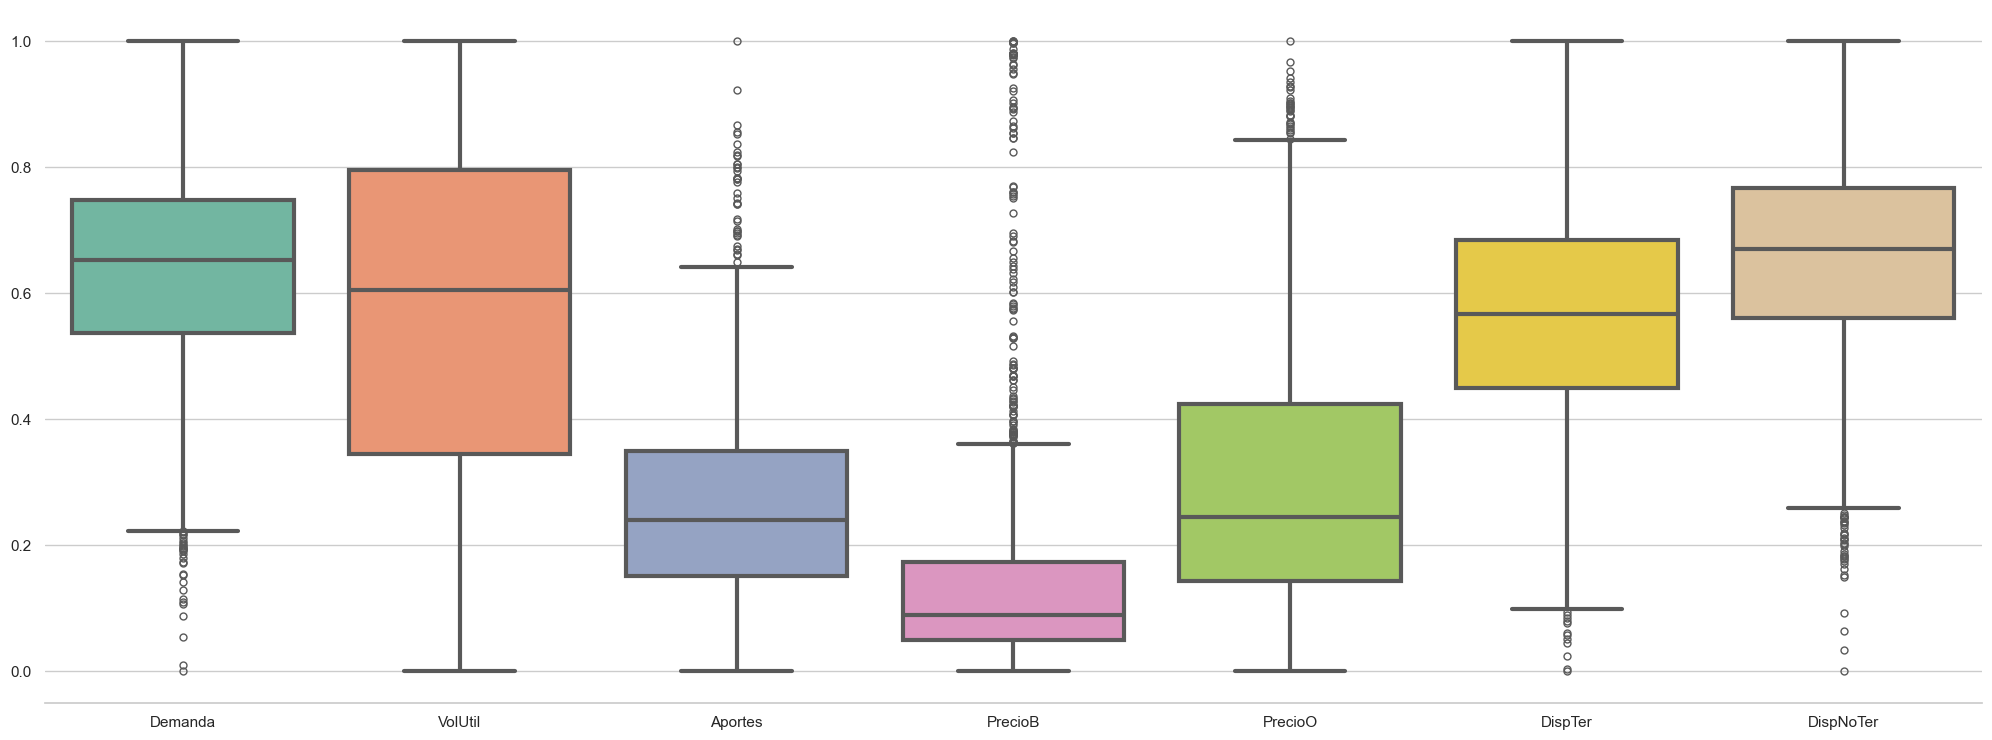

In [22]:
# Configuramos el tamaño de la figura para los gráficos de Seaborn.
sns.set(rc={'figure.figsize':(25,9)})

# Establecemos el estilo del gráfico a 'whitegrid' para un fondo con rejilla blanca.
sns.set(style="whitegrid")

# Creamos un boxplot de los datos normalizados con un ancho de línea específico y una paleta de colores.
sns.boxplot(data = Datos_Min_Max, linewidth = 3, palette="Set2", fliersize = 5)

# Eliminamos el borde izquierdo del gráfico para un estilo más limpio.
sns.despine(left=True)


In [23]:
Features = Datos_Min_Max  # Asigna el DataFrame normalizado a una nueva variable llamada Features.

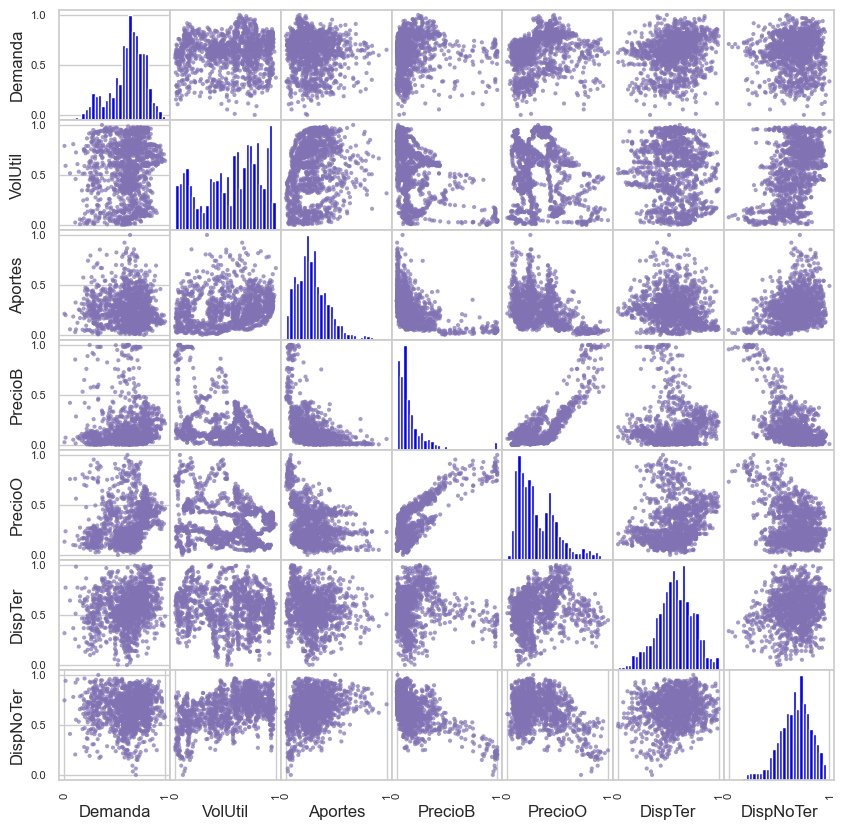

In [24]:
# Creamos una matriz de gráficos de dispersión e histogramas para visualizar las relaciones entre características.
pd.plotting.scatter_matrix(Features, 
                           alpha=0.7, 
                           figsize=(10,10), 
                           range_padding = 0.1, 
                           diagonal='hist',
                           color = 'm', 
                           hist_kwds = {'bins':30, 'color':'blue'})
# Mostramos los gráficos generados.
plt.show()


,Demanda,VolUtil,Aportes,PrecioB,PrecioO,DispTer,DispNoTer
Demanda,1.000000,0.117066,-0.046764,0.038306,0.215331,0.219799,0.035165
VolUtil,0.117066,1.000000,0.204034,-0.444073,-0.226896,-0.046828,0.462185
Aportes,-0.046764,0.204034,1.000000,-0.488304,-0.380357,-0.158406,0.306482
PrecioB,0.038306,-0.444073,-0.488304,1.000000,0.787062,-0.014349,-0.607741
PrecioO,0.215331,-0.226896,-0.380357,0.787062,1.000000,0.200999,-0.343909


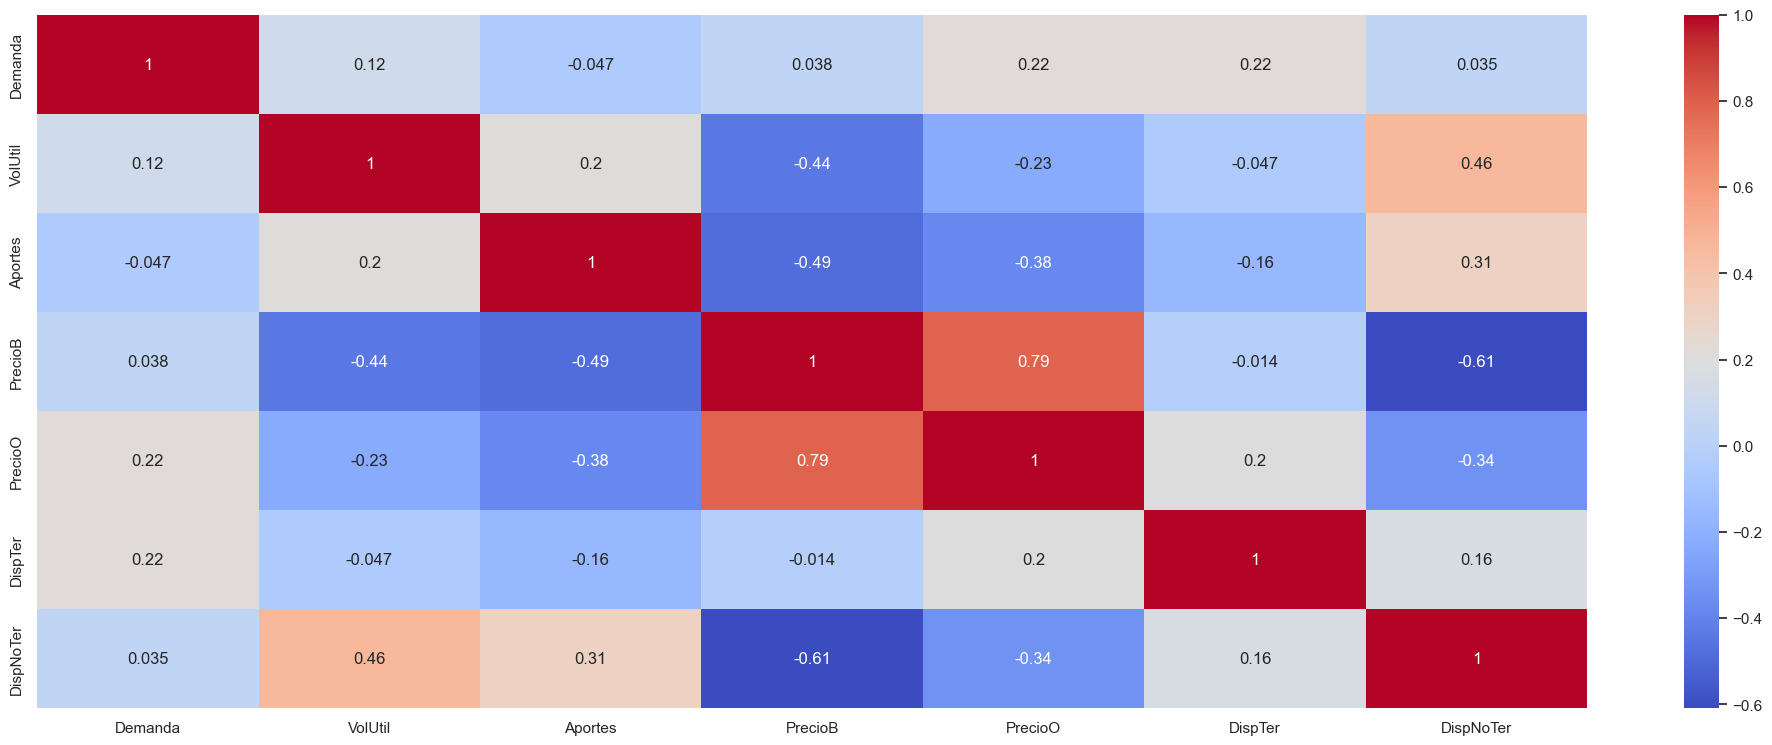

In [25]:
# Calculamos la matriz de correlación del DataFrame 'Features'.
matriz_corr = Features.corr()

# Creamos un mapa de calor utilizando Seaborn para visualizar la matriz de correlación.
sns.heatmap(Features.corr(), annot=True, cmap='coolwarm')

# Mostramos las primeras filas de la matriz de correlación para una inspección rápida.
matriz_corr.head()